# <h1 style="color: teal">APPARENT TEMPERATURE PREDICTION USING WEATHER VARIABLES</h1>

# <h1><span style="color: teal">INDEX :</span></h1>

I. [INTRODUCTION](#1)

II. [DATA CLEANING](#2)

III. [ELABORATORY DATA ANALYSIS](#3)
- [Corelattion in Data](#31)
- [Data Visualization](#32)

IV. [PREDICTING APPARENT TEMPERATURE](#4)

v. [SUMMARY](#5)

# <h1><a id='1' style="color: teal">I. INTRODUCTION</a></h1>

## <Li style="list-style-type: square"><span style="color: teal">Question Statement</span></Li>
Is there a relationship between humidity and temperature? What about between humidity and apparent temperature? Can you predict the apparent temperature given the humidity?

Statistics and Machine Learning can help us answer these questions and predict various relations and variables given the data.
Apparent temperature is the temperature that it feels like to our body because of other weather variables other than temperature.This is generally higher incase of high humidity.

In this project i am trying to predict the apparent temperature given other weather variables in an hourly manner.

## <Li style="list-style-type: square"><span style="color: teal">Objective</span></li>
<li>Clean the data and drop useless columns.</li>
<li>Make a EDA report.</li>
<li>Visualize the distributions of various features and correlations between them.</li>
<li>Feature engineering to extract the correct features for the model.</li>
<li>Train a regression model to predict the apparent temperature.</li>


In [4]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# Loading weather_data.csv as in a variable named "data"
data = pd.read_csv('weather_data.csv')
# Showing First five elements.
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [6]:
# data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            5999 non-null   object 
 1   Summary                   5999 non-null   object 
 2   Precip Type               5999 non-null   object 
 3   Temperature (C)           5999 non-null   float64
 4   Apparent Temperature (C)  5999 non-null   float64
 5   Humidity                  5999 non-null   float64
 6   Wind Speed (km/h)         5999 non-null   float64
 7   Wind Bearing (degrees)    5999 non-null   int64  
 8   Visibility (km)           5999 non-null   float64
 9   Loud Cover                5999 non-null   int64  
 10  Pressure (millibars)      5999 non-null   float64
 11  Daily Summary             5999 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 562.5+ KB


In [7]:
data.shape

(5999, 12)

In [8]:
data.size

71988

In [9]:
list(data.columns)

['Formatted Date',
 'Summary',
 'Precip Type',
 'Temperature (C)',
 'Apparent Temperature (C)',
 'Humidity',
 'Wind Speed (km/h)',
 'Wind Bearing (degrees)',
 'Visibility (km)',
 'Loud Cover',
 'Pressure (millibars)',
 'Daily Summary']

In [10]:
data.describe(include='all')

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
count,5999,5999,5999,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.0,5999.000000,5999
unique,5999,14,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58
top,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mostly cloudy throughout the day.
freq,1,1791,4762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,600
mean,NaN,NaN,NaN,10.217695,8.958658,0.779488,10.007362,190.349558,9.476875,0.0,997.359828,NaN
std,NaN,NaN,NaN,10.565425,11.923712,0.173051,6.536619,107.026792,4.038583,0.0,145.173638,NaN
min,NaN,NaN,NaN,-14.088889,-22.094444,0.270000,0.000000,0.000000,0.000000,0.0,0.000000,NaN
25%,NaN,NaN,NaN,1.094444,-1.538889,0.680000,4.878300,122.000000,6.906900,0.0,1012.060000,NaN
50%,NaN,NaN,NaN,10.050000,10.050000,0.830000,9.064300,190.000000,9.982000,0.0,1016.840000,NaN
75%,NaN,NaN,NaN,18.722222,18.722222,0.920000,13.395200,287.000000,11.270000,0.0,1022.490000,NaN


# <h1><a id="2" style="color: teal">II. DATA CLEANING</a></h1>

## <Li style="list-style-type: square"><span style="color: teal">Statement:</span></Li>
<li>Perform data cleaning using pandas library. Which includes replacing the miscoded information and handling missing data.</li>

In [11]:
# information of data before cleaning.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            5999 non-null   object 
 1   Summary                   5999 non-null   object 
 2   Precip Type               5999 non-null   object 
 3   Temperature (C)           5999 non-null   float64
 4   Apparent Temperature (C)  5999 non-null   float64
 5   Humidity                  5999 non-null   float64
 6   Wind Speed (km/h)         5999 non-null   float64
 7   Wind Bearing (degrees)    5999 non-null   int64  
 8   Visibility (km)           5999 non-null   float64
 9   Loud Cover                5999 non-null   int64  
 10  Pressure (millibars)      5999 non-null   float64
 11  Daily Summary             5999 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 562.5+ KB


In [12]:
# dropping unnecessary Columns. (which includes text.)
cols = ['Summary','Precip Type','Daily Summary','Wind Bearing (degrees)','Visibility (km)','Loud Cover']
data = data.drop(cols,axis=1)

In [13]:
# Converting Formatted Date from Object to DateTimeObject. , utc=True
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], utc=True)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Formatted Date            5999 non-null   datetime64[ns, UTC]
 1   Temperature (C)           5999 non-null   float64            
 2   Apparent Temperature (C)  5999 non-null   float64            
 3   Humidity                  5999 non-null   float64            
 4   Wind Speed (km/h)         5999 non-null   float64            
 5   Pressure (millibars)      5999 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(5)
memory usage: 281.3 KB


In [14]:
# Indexing according to date and time.
idata = data.sort_values(by=['Formatted Date'])

In [15]:
# Setting Index
idata = idata.set_index('Formatted Date')
idata.index

DatetimeIndex(['2005-12-31 23:00:00+00:00', '2006-01-01 00:00:00+00:00',
               '2006-01-01 01:00:00+00:00', '2006-01-01 02:00:00+00:00',
               '2006-01-01 03:00:00+00:00', '2006-01-01 04:00:00+00:00',
               '2006-01-01 05:00:00+00:00', '2006-01-01 06:00:00+00:00',
               '2006-01-01 07:00:00+00:00', '2006-01-01 08:00:00+00:00',
               ...
               '2006-12-31 13:00:00+00:00', '2006-12-31 14:00:00+00:00',
               '2006-12-31 15:00:00+00:00', '2006-12-31 16:00:00+00:00',
               '2006-12-31 17:00:00+00:00', '2006-12-31 18:00:00+00:00',
               '2006-12-31 19:00:00+00:00', '2006-12-31 20:00:00+00:00',
               '2006-12-31 21:00:00+00:00', '2006-12-31 22:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Formatted Date', length=5999, freq=None)

In [16]:
#removing duplicate values in the index
idata.index.drop_duplicates(keep='first')

DatetimeIndex(['2005-12-31 23:00:00+00:00', '2006-01-01 00:00:00+00:00',
               '2006-01-01 01:00:00+00:00', '2006-01-01 02:00:00+00:00',
               '2006-01-01 03:00:00+00:00', '2006-01-01 04:00:00+00:00',
               '2006-01-01 05:00:00+00:00', '2006-01-01 06:00:00+00:00',
               '2006-01-01 07:00:00+00:00', '2006-01-01 08:00:00+00:00',
               ...
               '2006-12-31 13:00:00+00:00', '2006-12-31 14:00:00+00:00',
               '2006-12-31 15:00:00+00:00', '2006-12-31 16:00:00+00:00',
               '2006-12-31 17:00:00+00:00', '2006-12-31 18:00:00+00:00',
               '2006-12-31 19:00:00+00:00', '2006-12-31 20:00:00+00:00',
               '2006-12-31 21:00:00+00:00', '2006-12-31 22:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Formatted Date', length=5999, freq=None)

In [17]:
# data after cleaning
idata.dropna()
idata.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,,
2005-12-31 23:00:00+00:00,0.577778,-4.050000,0.89,17.1143,1016.66
2006-01-01 00:00:00+00:00,1.161111,-3.238889,0.85,16.6152,1016.15
2006-01-01 01:00:00+00:00,1.666667,-3.155556,0.82,20.2538,1015.87
2006-01-01 02:00:00+00:00,1.711111,-2.194444,0.82,14.4900,1015.56
2006-01-01 03:00:00+00:00,1.183333,-2.744444,0.86,13.9426,1014.98


In [18]:
# information of data after after cleaning.
idata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5999 entries, 2005-12-31 23:00:00+00:00 to 2006-12-31 22:00:00+00:00
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Temperature (C)           5999 non-null   float64
 1   Apparent Temperature (C)  5999 non-null   float64
 2   Humidity                  5999 non-null   float64
 3   Wind Speed (km/h)         5999 non-null   float64
 4   Pressure (millibars)      5999 non-null   float64
dtypes: float64(5)
memory usage: 410.2 KB


# <h1><a id="3" style="color:teal">III. EXPLORATORY DATA ANALYSIS</a></h1>

## <Li style="list-style-type: square"><span style="color: teal">Statement:</span></Li>
<li>Make a Exploratory Data Analysis on the data using pandas.</li>
<li>Visualize distributions and correlation of features using seaborn and pandas</li>

<AxesSubplot: xlabel='Formatted Date'>

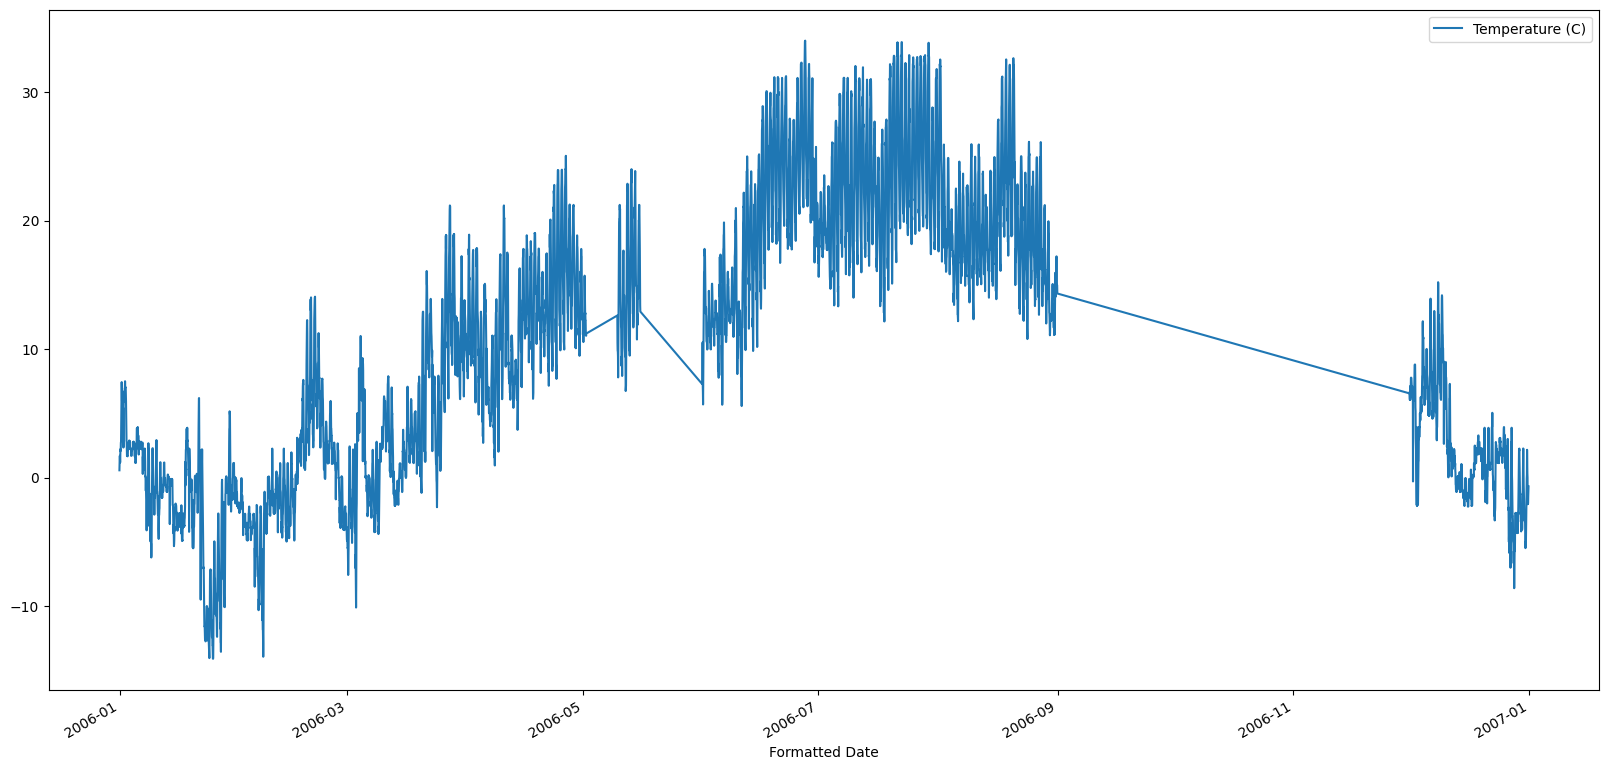

In [19]:
#plotting the data
idata.plot(y="Temperature (C)",figsize=(20,10))

## As you see, the graph is too congested. We Resample the data in days.

In [20]:
#resampling the data into day format
idata2 = idata.resample(rule='D').mean()
idata2.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,,
2005-12-31 00:00:00+00:00,0.577778,-4.050000,0.890000,17.114300,1016.660000
2006-01-01 00:00:00+00:00,4.075000,-0.174537,0.817083,21.229192,1011.985000
2006-01-02 00:00:00+00:00,5.263194,1.808796,0.847083,17.824713,1010.384167
2006-01-03 00:00:00+00:00,2.340509,0.445370,0.897083,7.726658,1021.170833
2006-01-04 00:00:00+00:00,2.251852,-0.663194,0.906667,12.152817,981.770833


<AxesSubplot: xlabel='Formatted Date'>

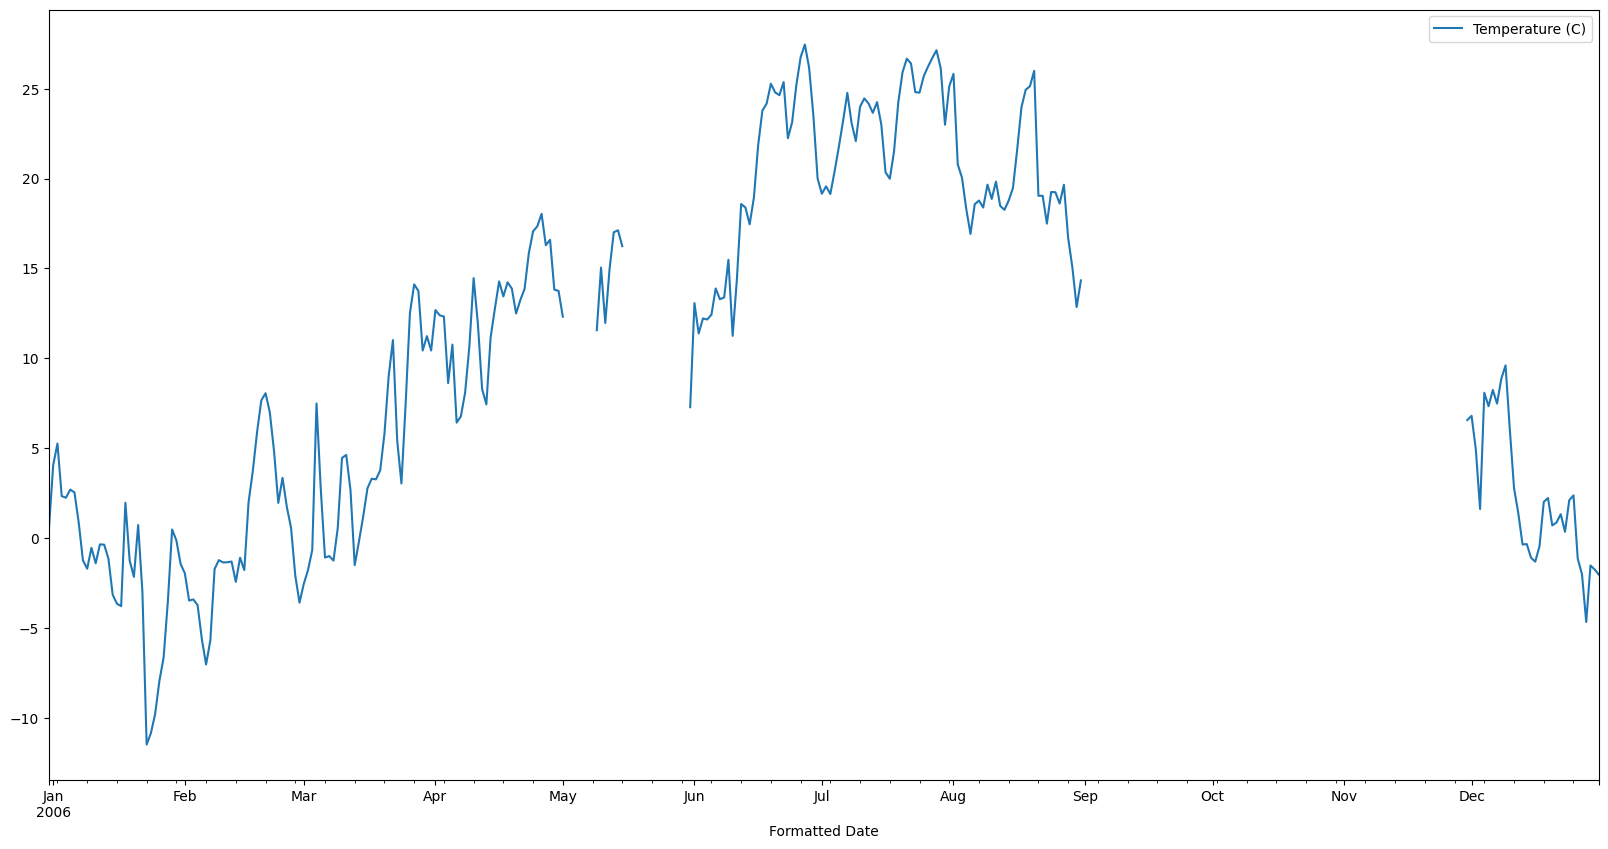

In [21]:
idata2.plot(y="Temperature (C)",figsize=(20,10))

## Now we see that data is not complete in the month of May, Sept, Oct and Nov.

## <h1 style="color:teal">Taking data of january month only.</h1>

In [22]:
#extracting data from the month of January
jan2006 = idata['2006-01-01':'2006-01-31']
jan2006

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,,
2006-01-01 00:00:00+00:00,1.161111,-3.238889,0.85,16.6152,1016.15
2006-01-01 01:00:00+00:00,1.666667,-3.155556,0.82,20.2538,1015.87
2006-01-01 02:00:00+00:00,1.711111,-2.194444,0.82,14.4900,1015.56
2006-01-01 03:00:00+00:00,1.183333,-2.744444,0.86,13.9426,1014.98
2006-01-01 04:00:00+00:00,1.205556,-3.072222,0.85,15.9068,1014.08
...,...,...,...,...,...
2006-01-31 19:00:00+00:00,-2.400000,-2.400000,0.88,4.6046,1024.54
2006-01-31 20:00:00+00:00,-1.933333,-1.933333,0.85,3.2200,1024.29
2006-01-31 21:00:00+00:00,-1.922222,-3.988889,0.86,5.4901,1024.66


<AxesSubplot: xlabel='Formatted Date'>

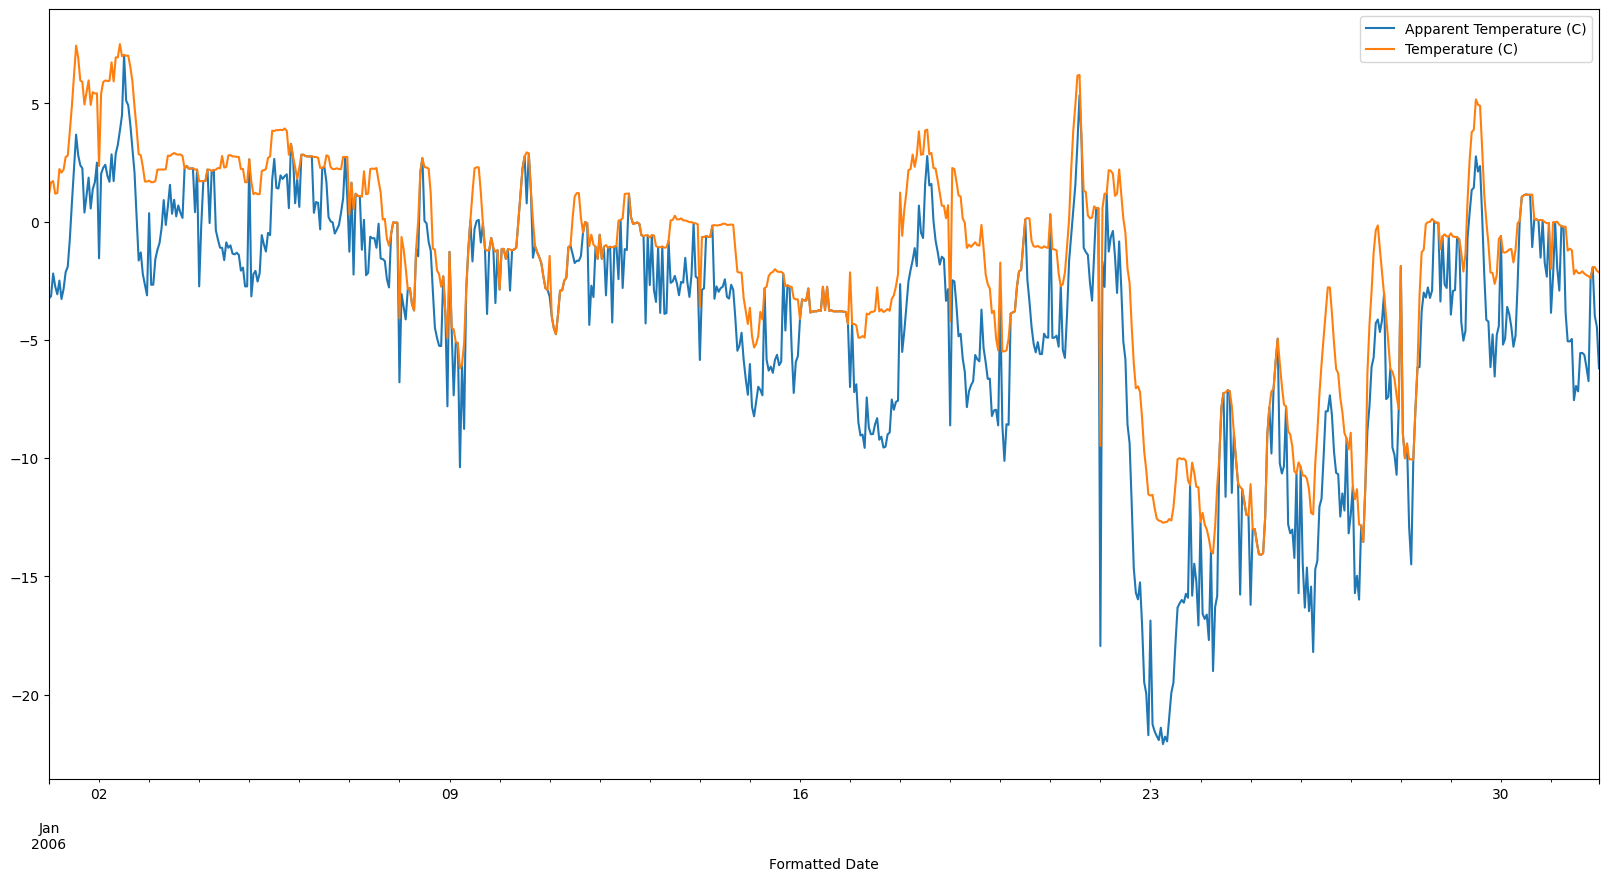

In [23]:
jan2006.plot(y=['Apparent Temperature (C)','Temperature (C)'],kind='line',figsize=(20,10))

## As you see, the graph is too congested. We Resample the data in days.

In [24]:
#resampling
JAN = jan2006.resample(rule='D').mean()
JAN.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,,
2006-01-01 00:00:00+00:00,4.075000,-0.174537,0.817083,21.229192,1011.985000
2006-01-02 00:00:00+00:00,5.263194,1.808796,0.847083,17.824713,1010.384167
2006-01-03 00:00:00+00:00,2.340509,0.445370,0.897083,7.726658,1021.170833
2006-01-04 00:00:00+00:00,2.251852,-0.663194,0.906667,12.152817,981.770833
2006-01-05 00:00:00+00:00,2.703935,0.445833,0.951250,8.991179,935.873750


<AxesSubplot: xlabel='Formatted Date'>

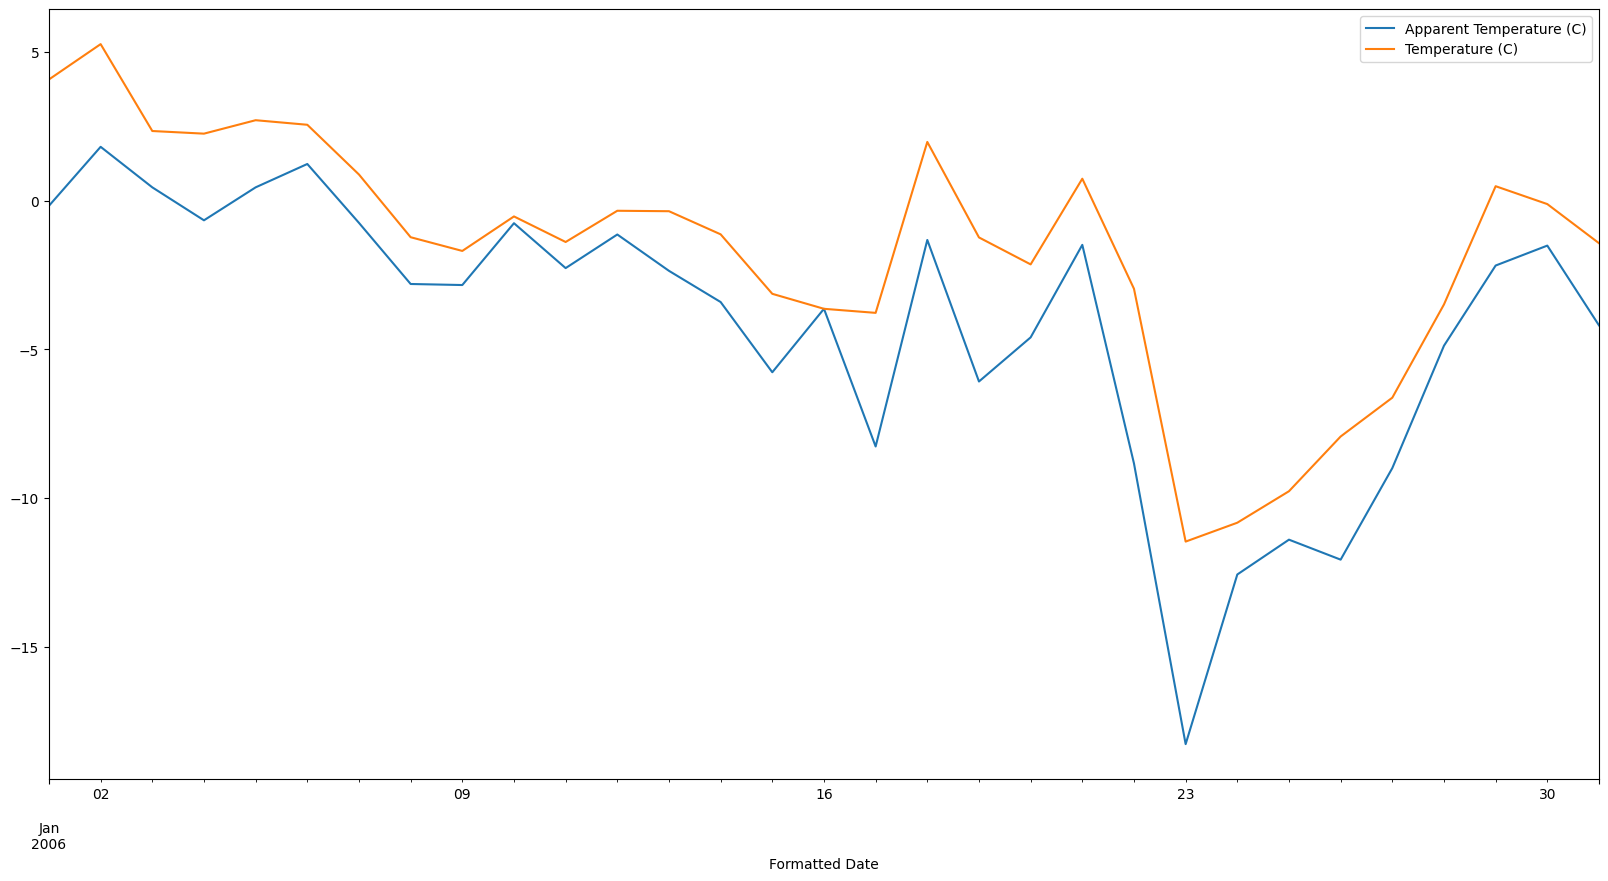

In [25]:
JAN.plot(y=['Apparent Temperature (C)','Temperature (C)'],kind='line',figsize=(20,10))

## Difference in Apparent Temperature and Temperature is easily visible.

## <h1 style="color: teal">Now Plotting as per Seasons.</h1>

In [26]:
winter = idata2['2006-01-01':'2006-02-28']
winter2 = idata2['2006-12-01':'2006-12-31']
spring = idata2['2006-03-01':'2006-05-31']
summer = idata2['2006-06-01':'2006-08-31']

<AxesSubplot: xlabel='Formatted Date'>

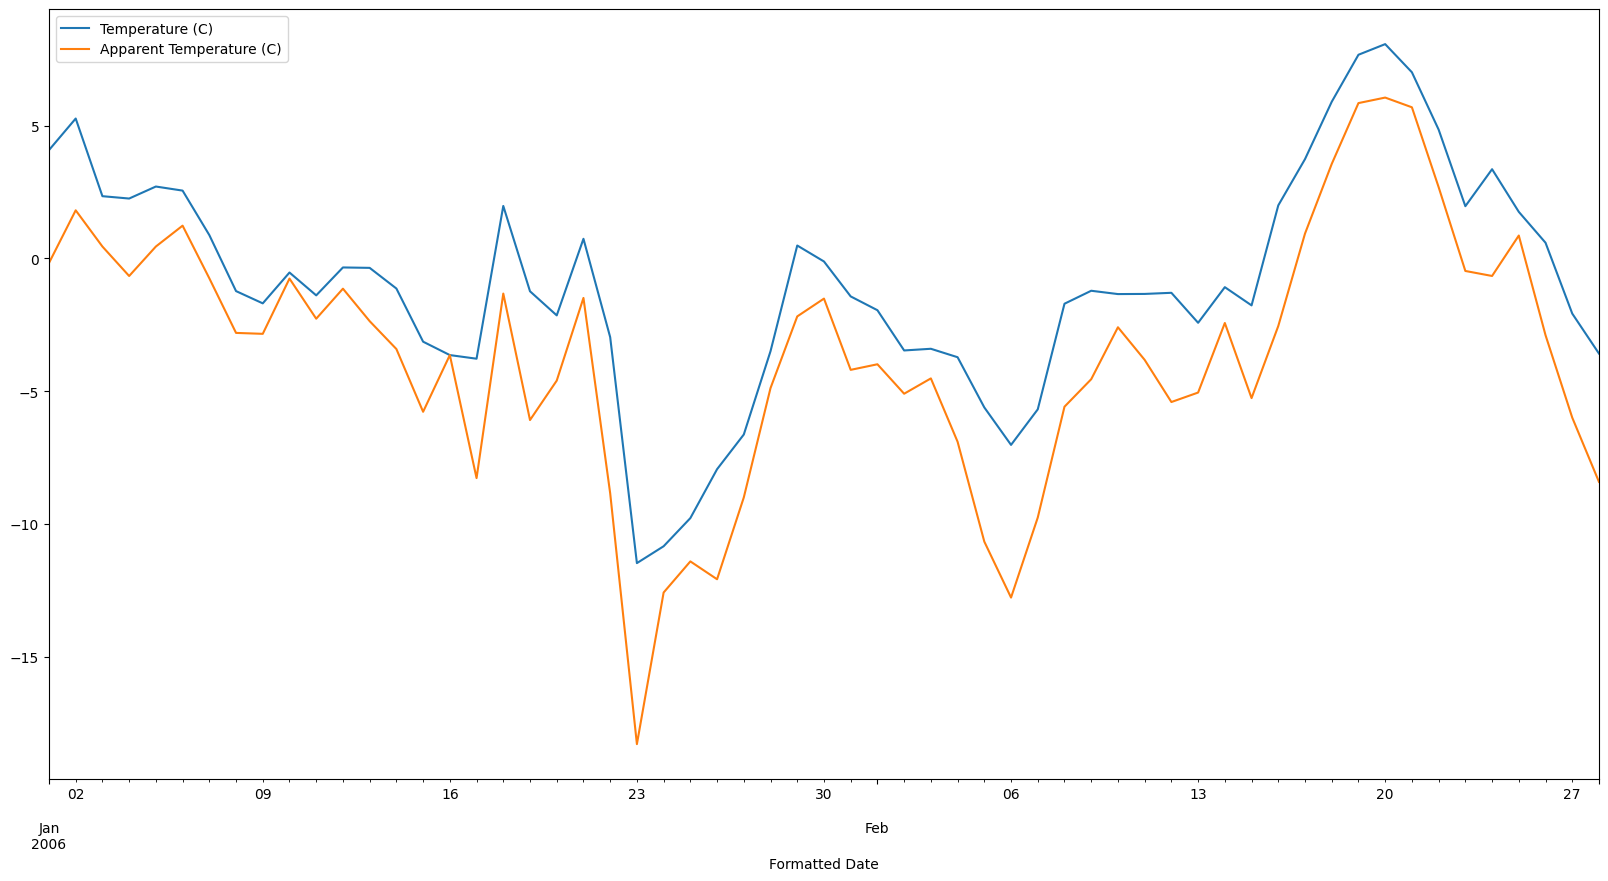

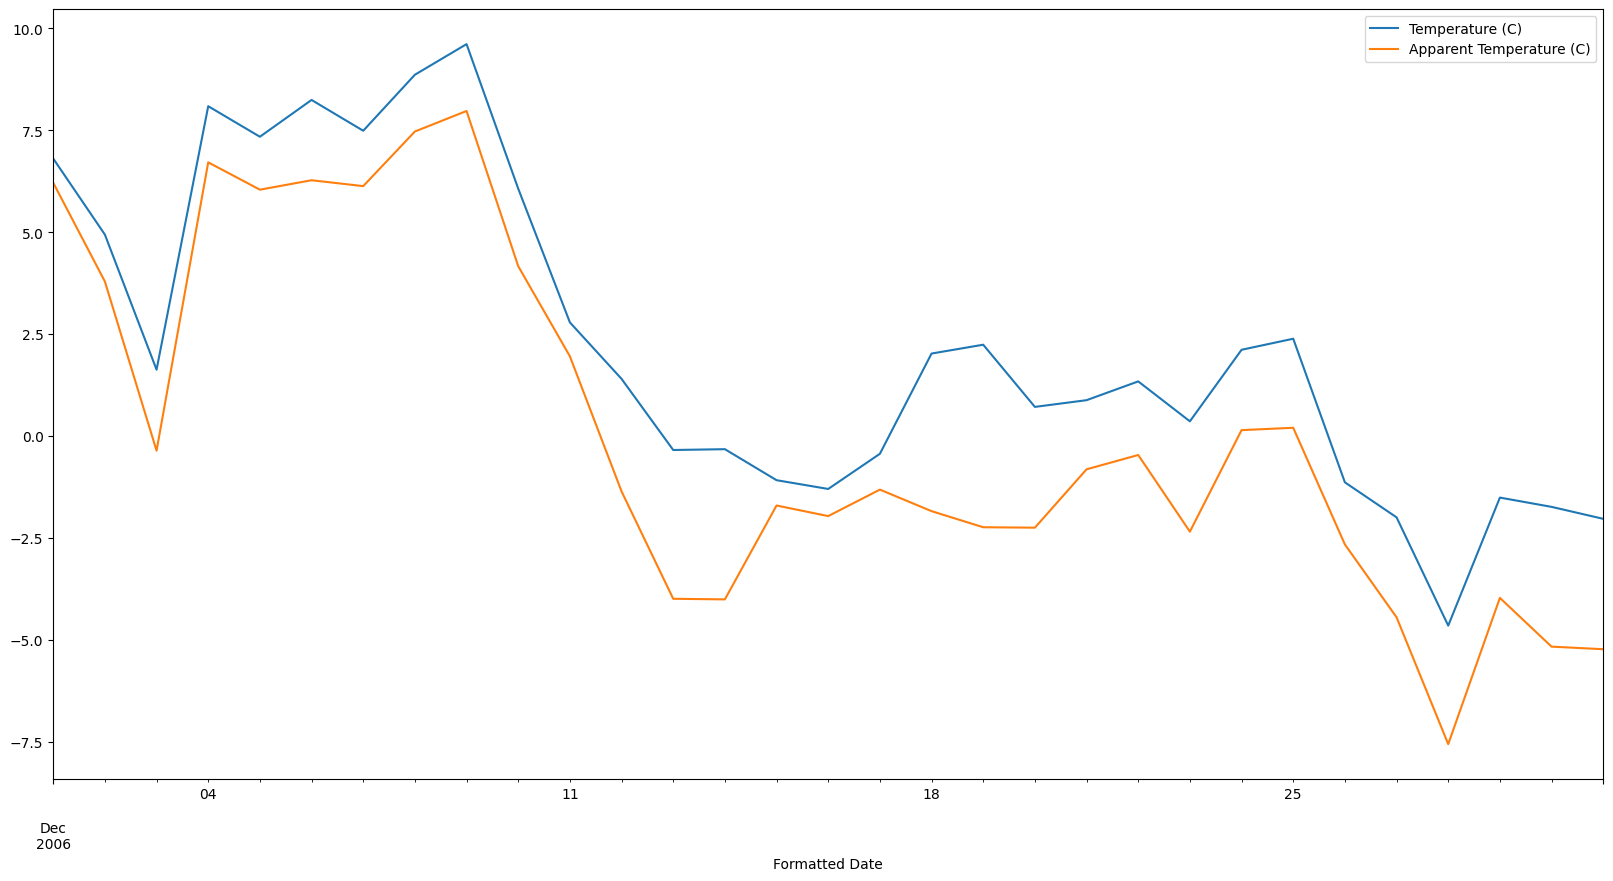

In [27]:
winter.plot(y= ['Temperature (C)','Apparent Temperature (C)'],figsize=(20,10))
winter2.plot(y= ['Temperature (C)','Apparent Temperature (C)'],figsize=(20,10))

<AxesSubplot: xlabel='Formatted Date'>

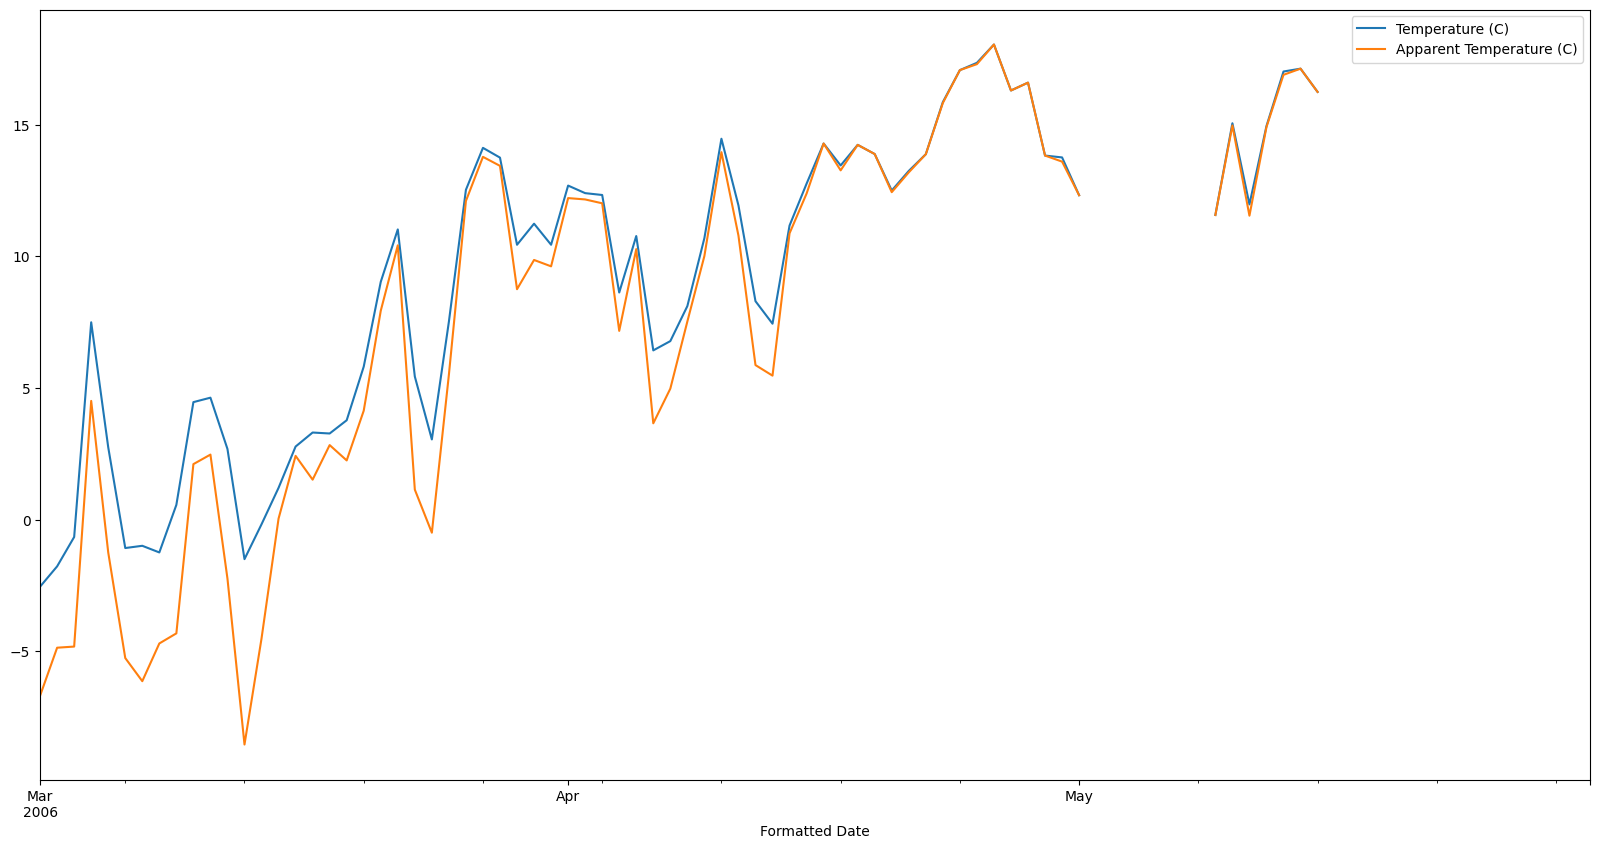

In [28]:
spring.plot(y= ['Temperature (C)','Apparent Temperature (C)'],figsize=(20,10))

<AxesSubplot: xlabel='Formatted Date'>

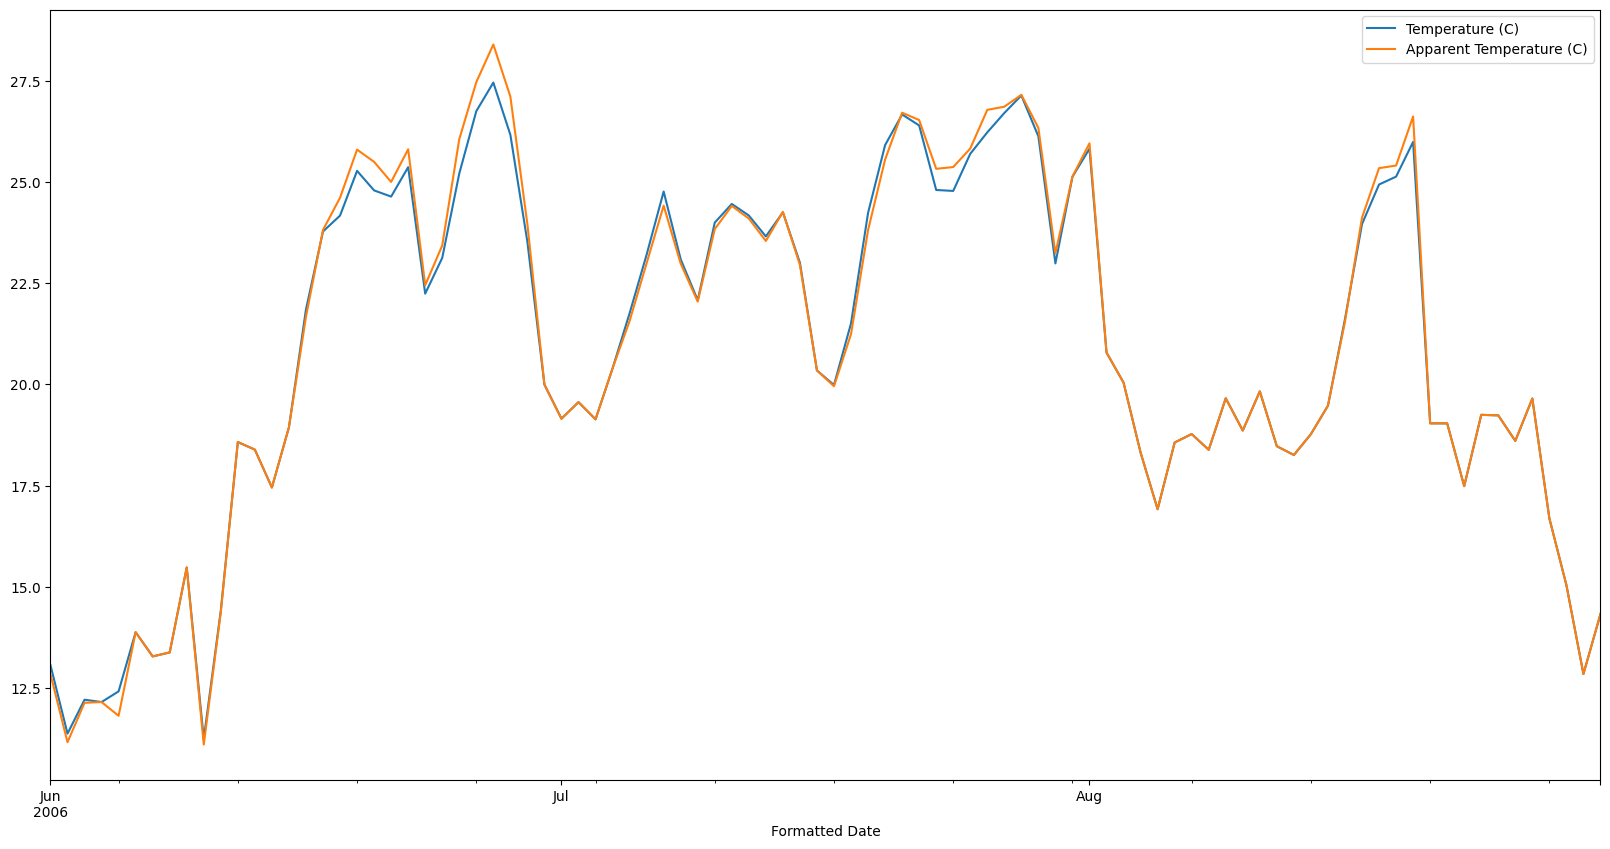

In [29]:
summer.plot(y= ['Temperature (C)','Apparent Temperature (C)'],figsize=(20,10))

## <h1><a id="31" style="color: teal">Correlation in data</a></h1>

In [30]:
#checking correlation between the cols
data.corr()

C:\Users\Shauk\AppData\Local\Temp\ipykernel_2096\755673796.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Temperature (C),1.000000,0.992881,-0.564260,-0.053935,-0.080315
Apparent Temperature (C),0.992881,1.000000,-0.535399,-0.126701,-0.077491
Humidity,-0.564260,-0.535399,1.000000,-0.209529,0.061836
Wind Speed (km/h),-0.053935,-0.126701,-0.209529,1.000000,-0.043172
Pressure (millibars),-0.080315,-0.077491,0.061836,-0.043172,1.000000


C:\Users\Shauk\AppData\Local\Temp\ipykernel_2096\565286379.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


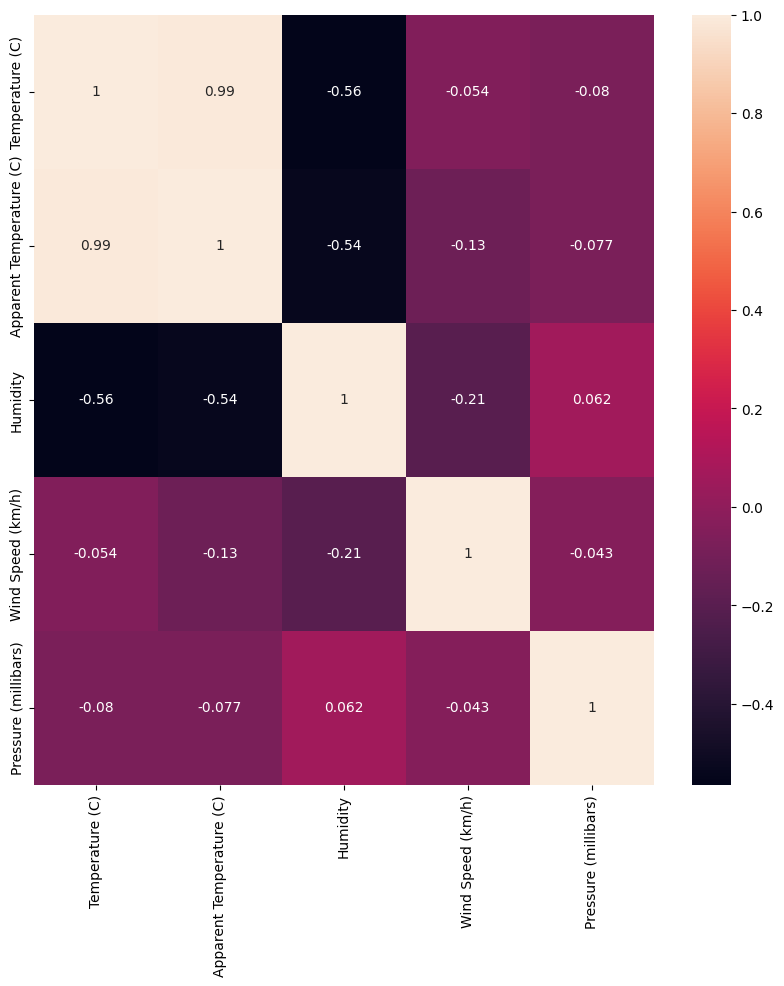

In [31]:
#plotting the correlation
plt.figure(figsize  =(10,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

## <h1><a id="32" style="color:teal">Data Visualization</a></h1>

In [33]:
sns.jointplot('Temperature (C)', 'Apparent Temperature (C)',kind="reg", data=data)

TypeError: jointplot() got multiple values for argument 'data'

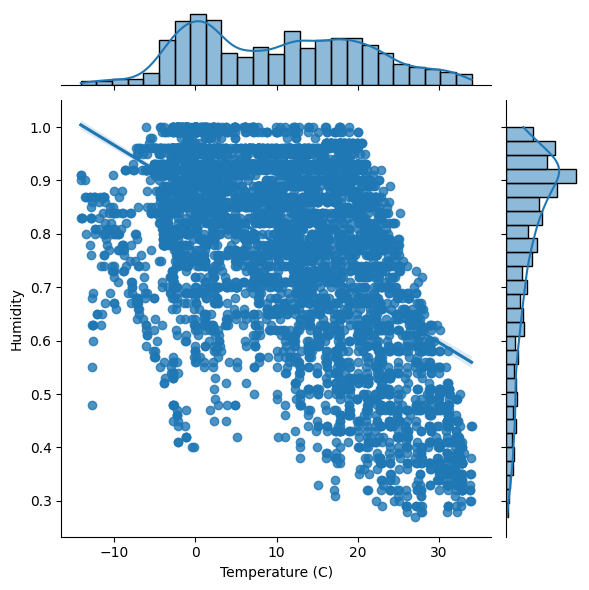

In [34]:
sns.jointplot(kind='reg',y=data['Humidity'],x=data['Temperature (C)'])

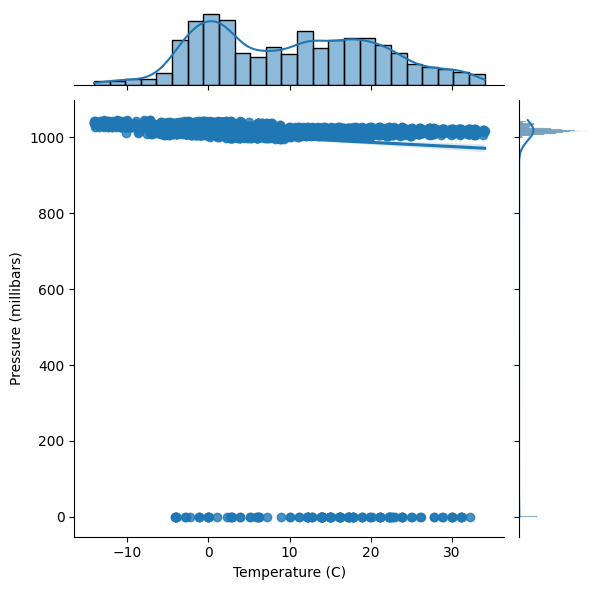

In [36]:
sns.jointplot(kind='reg',y=data['Pressure (millibars)'],x=data['Temperature (C)'])

In [37]:
sns.jointplot('Apparent Temperature (C)','Pressure (millibars)',kind="reg", data=data)

TypeError: jointplot() got multiple values for argument 'data'

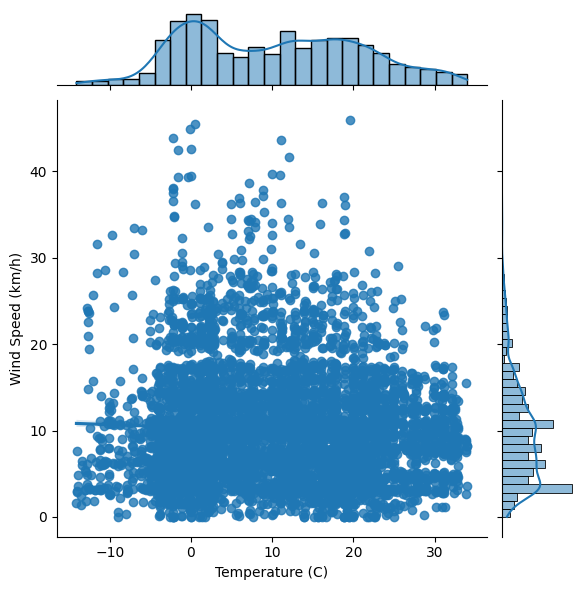

In [38]:
sns.jointplot(kind='reg',y=data['Wind Speed (km/h)'],x=data['Temperature (C)'])

In [40]:
sns.jointplot('Apparent Temperature (C)','Wind Speed (km/h)',kind="reg", data=data)

TypeError: jointplot() got multiple values for argument 'data'

In [41]:
sns.jointplot('Apparent Temperature (C)','Humidity',kind="reg", data=data)

TypeError: jointplot() got multiple values for argument 'data'

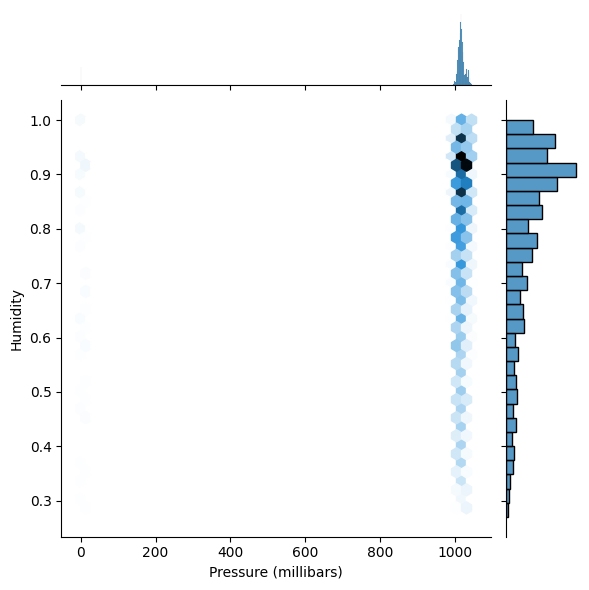

In [42]:
sns.jointplot(kind='hex',y=data['Humidity'],x=data['Pressure (millibars)'])

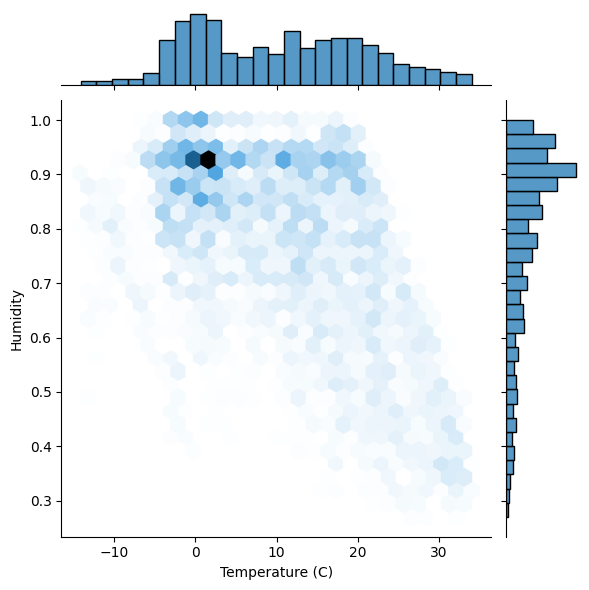

In [43]:
sns.jointplot(kind='hex',y=data['Humidity'],x=data['Temperature (C)'])

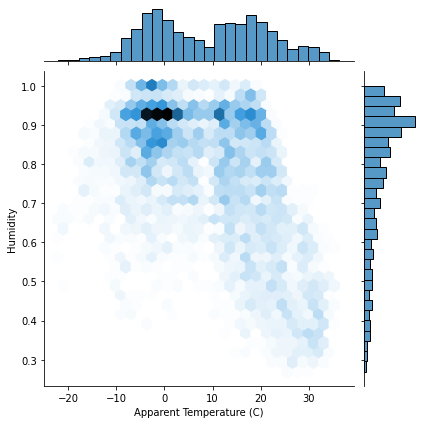

In [ ]:
sns.jointplot(kind='hex',y=data['Humidity'],x=data['Apparent Temperature (C)'])

<Figure size 2000x2000 with 0 Axes>

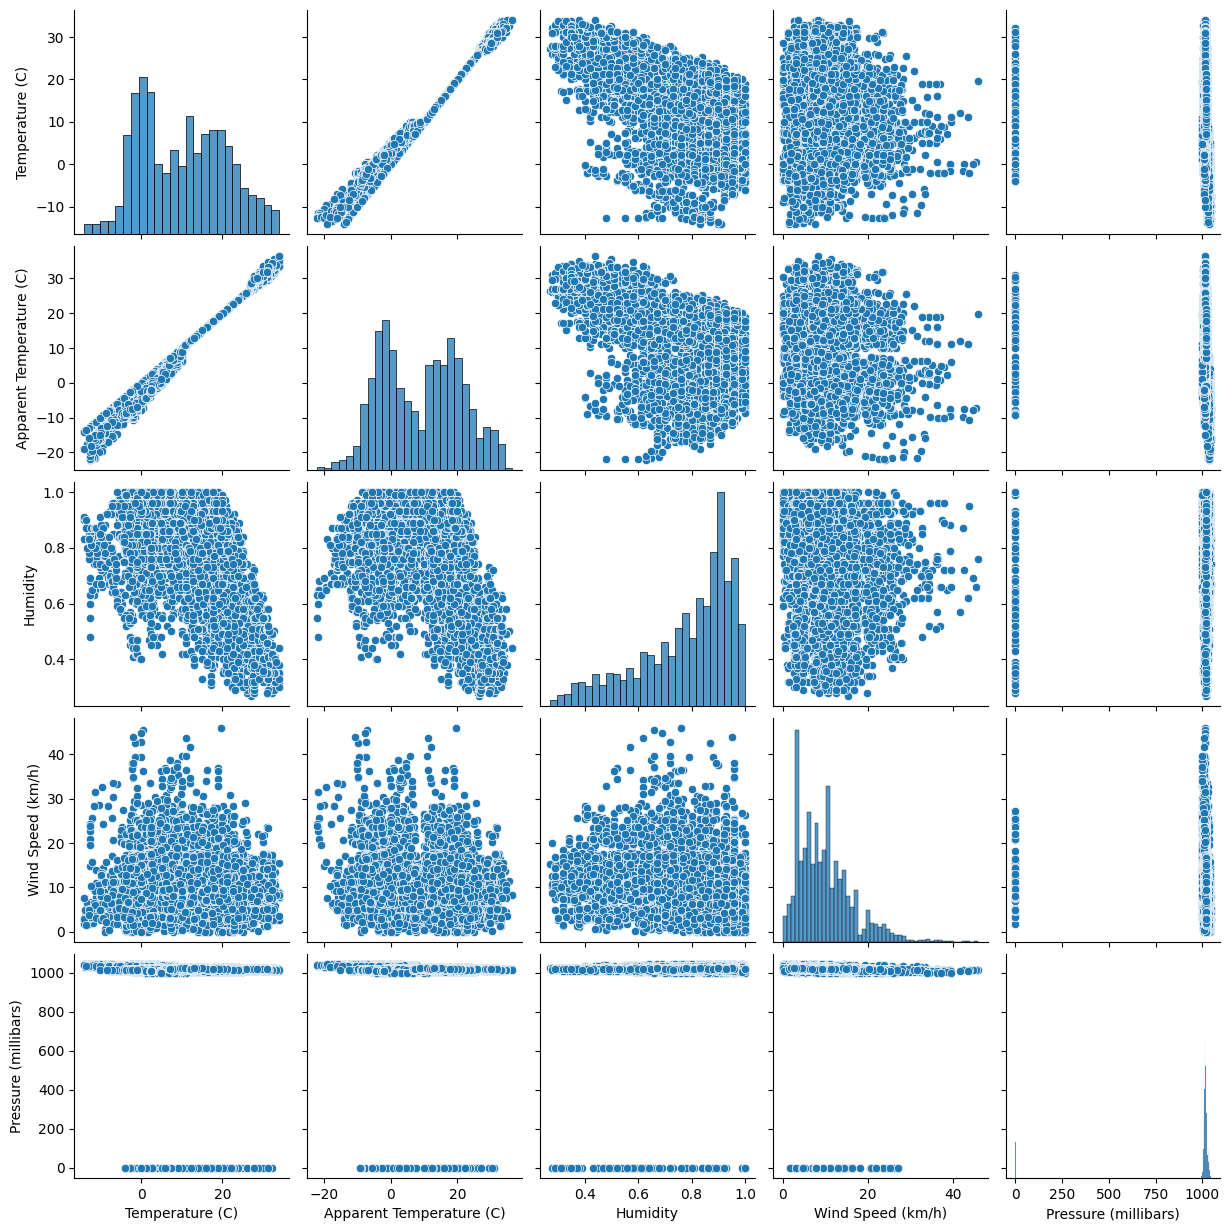

In [44]:
plt.figure(figsize  =(20,20))
sns.pairplot(data)
plt.show()

# <h1><a id="4" style="color:teal">IV. PREDICTING APPERANT TEMPERATURE</a></h1>

## <Li style="list-style-type: square"><span style="color: teal">Statement:</span></Li>
<li>Build a linear regression model taking the selected features through feature engineering</li>
<li>Predict the apparent temp for the split test data(Use 30% of the data for test)</li>

## <span style="color:teal">We are splitting the data into two parts i.e. 70% of the data is gonna be in the training model and the 30% of the data is going to be in the testing model and will predict the Apparent Temperature.</span>

In [46]:
#taking 70% of the data for training
X = idata['2006-01-01':'2006-07-20']
X

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,,
2006-01-01 00:00:00+00:00,1.161111,-3.238889,0.85,16.6152,1016.15
2006-01-01 01:00:00+00:00,1.666667,-3.155556,0.82,20.2538,1015.87
2006-01-01 02:00:00+00:00,1.711111,-2.194444,0.82,14.4900,1015.56
2006-01-01 03:00:00+00:00,1.183333,-2.744444,0.86,13.9426,1014.98
2006-01-01 04:00:00+00:00,1.205556,-3.072222,0.85,15.9068,1014.08
...,...,...,...,...,...
2006-07-20 19:00:00+00:00,25.027778,25.027778,0.62,0.0000,1020.38
2006-07-20 20:00:00+00:00,23.244444,23.244444,0.70,1.1109,1020.61
2006-07-20 21:00:00+00:00,22.255556,22.255556,0.79,2.7370,1020.75


In [47]:
#30% of data for testing
X1 = idata['2006-07-21':'2006-12-31']
X1

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,,
2006-07-21 00:00:00+00:00,21.277778,21.277778,0.85,2.7370,1018.96
2006-07-21 01:00:00+00:00,17.733333,17.733333,0.90,2.9946,1020.64
2006-07-21 02:00:00+00:00,17.711111,17.711111,0.90,6.1502,1020.62
2006-07-21 03:00:00+00:00,17.472222,17.472222,0.89,1.9159,1020.76
2006-07-21 04:00:00+00:00,16.766667,16.766667,0.93,3.2200,1020.82
...,...,...,...,...,...
2006-12-31 18:00:00+00:00,-0.827778,-4.211111,0.92,9.7405,1035.95
2006-12-31 19:00:00+00:00,-2.011111,-5.888889,0.99,10.6904,1035.78
2006-12-31 20:00:00+00:00,-1.500000,-5.327778,0.96,10.8997,1034.92


In [48]:
#taking cols for training the model
X_train = X[['Temperature (C)','Humidity','Wind Speed (km/h)','Pressure (millibars)']]
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4248 entries, 2006-01-01 00:00:00+00:00 to 2006-07-20 23:00:00+00:00
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature (C)       4248 non-null   float64
 1   Humidity              4248 non-null   float64
 2   Wind Speed (km/h)     4248 non-null   float64
 3   Pressure (millibars)  4248 non-null   float64
dtypes: float64(4)
memory usage: 165.9 KB


In [49]:
y_train = X['Apparent Temperature (C)']
y_train

Formatted Date
2006-01-01 00:00:00+00:00    -3.238889
2006-01-01 01:00:00+00:00    -3.155556
2006-01-01 02:00:00+00:00    -2.194444
2006-01-01 03:00:00+00:00    -2.744444
2006-01-01 04:00:00+00:00    -3.072222
                               ...    
2006-07-20 19:00:00+00:00    25.027778
2006-07-20 20:00:00+00:00    23.244444
2006-07-20 21:00:00+00:00    22.255556
2006-07-20 22:00:00+00:00    19.494444
2006-07-20 23:00:00+00:00    19.422222
Name: Apparent Temperature (C), Length: 4248, dtype: float64

In [50]:
X_test = X1[['Temperature (C)','Humidity','Wind Speed (km/h)','Pressure (millibars)']]
y_test = X1['Apparent Temperature (C)']

Test loss:  56.392281245852836


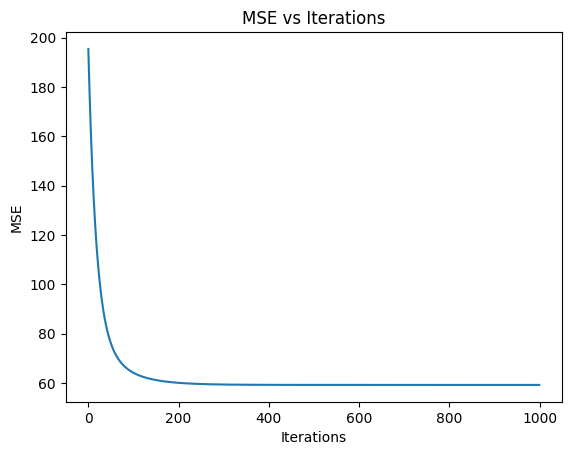

In [51]:
import numpy as np

#Define the data
# X_train = np.array([[1, 2], [3, 4], [5, 6], [7, 8]]) 
# y_train = np.array([1, 3, 5, 7])
# X_test = np.array([[9, 10], [11, 12]]) 
# y_test = np.array([9, 11])

#Standardize the data
X_mean = np.mean(X_train, axis=0)
X_std = np.std(X_train, axis=0)
X_train_standardized = (X_train - X_mean)/X_std
X_test_standardized = (X_test - X_mean)/X_std

#Define the model
def linear_model(X, weights):
    return np.dot(X, weights)

#Define the loss
def mse(y_pred, y_true):
    return np.mean((y_pred - y_true)**2)

#Define the gradient
def grad(X, y_pred, y_true):
    return (2/len(X)) * np.dot(X.T, (y_pred - y_true))

#Train the model
weights = np.zeros(X_train_standardized.shape[1])
learning_rate = 0.01
losses_linear = []

for i in range(1000):
    y_pred = linear_model(X_train_standardized, weights)
    weights -= learning_rate * grad(X_train_standardized, y_pred, y_train)
    losses_linear.append(mse(y_pred, y_train))

#Test the model
y_test_pred = linear_model(X_test_standardized, weights)
test_loss_linear = mse(y_test_pred, y_test)

#Print the results
print('Test loss: ', test_loss_linear)

#Plot the MSE and loss
import matplotlib.pyplot as plt

plt.plot(losses_linear)
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.title('MSE vs Iterations')
plt.show()

Test loss:  57.48200888460444


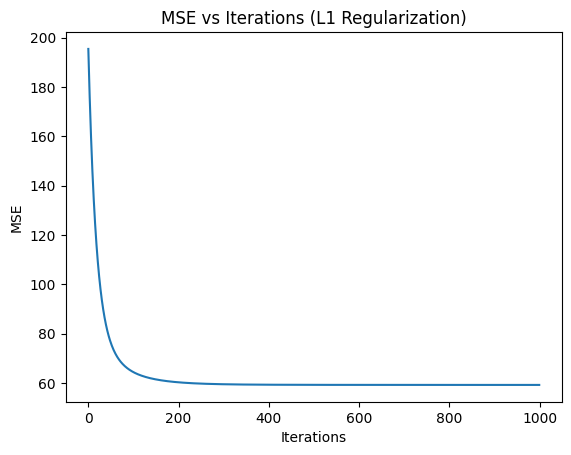

In [52]:
import numpy as np
#Standardize the data
X_mean = np.mean(X_train, axis=0)
X_std = np.std(X_train, axis=0)
X_train_standardized = (X_train - X_mean)/X_std
X_test_standardized = (X_test - X_mean)/X_std

#Define the model
def linear_model(X, weights):
    return np.dot(X, weights)

#Define the loss
def mse(y_pred, y_true):
    return np.mean((y_pred - y_true)**2)

#Define the gradient
def grad(X, y_pred, y_true):
    return (2/len(X)) * np.dot(X.T, (y_pred - y_true))

#Define the regularization
def l1_regularization(weights, alpha):
    return alpha * np.sum(np.abs(weights))

#Train the model
weights = np.zeros(X_train_standardized.shape[1])
learning_rate = 0.01
alpha = 0.01
losses_linear_l1 = []

for i in range(1000):
    y_pred = linear_model(X_train_standardized, weights)
    weights -= learning_rate * (grad(X_train_standardized, y_pred, y_train) + l1_regularization(weights, alpha))
    losses_linear_l1.append(mse(y_pred, y_train))

#Test the model
y_test_pred = linear_model(X_test_standardized, weights)
test_loss_linear_l1 = mse(y_test_pred, y_test)

#Print the results
print('Test loss: ', test_loss_linear_l1)

#Plot the MSE and loss
import matplotlib.pyplot as plt

plt.plot(losses_linear_l1)
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.title('MSE vs Iterations (L1 Regularization)')
plt.show()

Test loss:  67.76901728307158


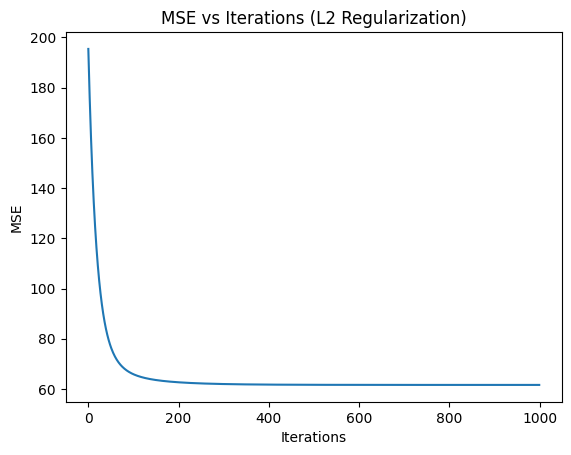

In [53]:
#Define the model
def linear_model(X, weights):
    return np.dot(X, weights)

#Define the loss
def mse(y_pred, y_true):
    return np.mean((y_pred - y_true)**2)

#Define the gradient
def grad(X, y_pred, y_true):
    return (2/len(X)) * np.dot(X.T, (y_pred - y_true))

#Define the regularization
def l2_regularization(weights, alpha):
    return alpha * np.sum(weights**2)

#Train the model
weights = np.zeros(X_train_standardized.shape[1])
learning_rate = 0.01
alpha = 0.01
losses_linear_l2 = []

for i in range(1000):
    y_pred = linear_model(X_train_standardized, weights)
    weights -= learning_rate * (grad(X_train_standardized, y_pred, y_train) + l2_regularization(weights, alpha))
    losses_linear_l2.append(mse(y_pred, y_train))

#Test the model
y_test_pred = linear_model(X_test_standardized, weights)
test_loss_linear_l2 = mse(y_test_pred, y_test)

#Print the results
print('Test loss: ', test_loss_linear_l2)

#Plot the MSE and loss
import matplotlib.pyplot as plt

plt.plot(losses_linear_l2)
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.title('MSE vs Iterations (L2 Regularization)')
plt.show()

In [54]:
# join the training losses in to a dataframe
losses = pd.DataFrame({'losses_linear': losses_linear, 'losses_linear_l1': losses_linear_l1, 'losses_linear_l2': losses_linear_l2})
losses

,losses_linear,losses_linear_l1,losses_linear_l2
0,195.444352,195.444352,195.444352
1,188.622371,188.622371,188.622371
2,182.181563,182.181845,182.181613
3,176.099638,176.100472,176.099880
4,170.355635,170.357278,170.356294
...,...,...,...
995,59.201738,59.233430,61.599264
996,59.201738,59.233427,61.599261
997,59.201738,59.233423,61.599258
998,59.201738,59.233420,61.599255


<AxesSubplot: >

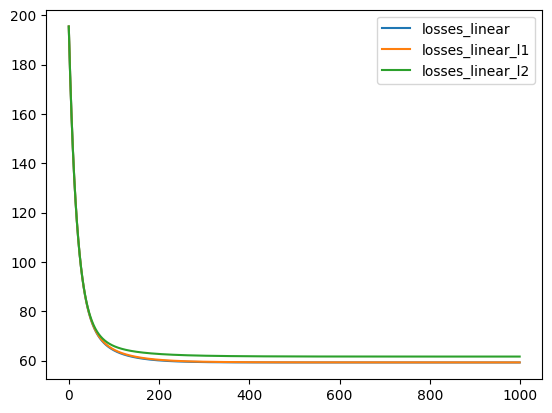

In [56]:
# plot the losses
losses.plot()

In [55]:
#join test losses in to a dataframe
test_losses = pd.DataFrame({'test_loss_linear': [test_loss_linear], 'test_loss_linear_l1': [test_loss_linear_l1], 'test_loss_linear_l2': [test_loss_linear_l2]})
test_losses

,test_loss_linear,test_loss_linear_l1,test_loss_linear_l2
0,56.392281,57.482009,67.769017
